In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
file_path = r'/Users/sachintony/Desktop/BCA/6BCA/ML/USRECD.csv'
df = pd.read_csv(file_path)

In [3]:
# 1. Initial Inspection
print("Dataset Overview:")
print(df.head(), "\n")
print("Dataset Info:")
print(df.info(), "\n")
print("Data Types:")
print(df.dtypes, "\n")

Dataset Overview:
   Year     Month     Region Home Size  Average Sales Price  \
0  2022  December    Midwest    Double               144300   
1  2022  December    Midwest   Single                 82300   
2  2022  December    Midwest    Total1               104700   
3  2022  December  Northeast    Double               158300   
4  2022  December  Northeast   Single                 75300   

   Number of Households (Thousands)  Median Income - Current Dollars  \
0                             28280                            73070   
1                             28280                            73070   
2                             28280                            73070   
3                             22630                            80360   
4                             22630                            80360   

   Median Income - 2022 Dollars  Mean Income - Current Dollars  \
0                         73070                         102400   
1                         73070       

In [4]:
# 2. Missing Values and Duplicates
print("Missing Values:")
print(df.isnull().sum(), "\n")
print(f"Number of duplicate rows: {df.duplicated().sum()}\n")

Missing Values:
Year                                0
Month                               0
Region                              0
Home Size                           0
Average Sales Price                 0
Number of Households (Thousands)    0
Median Income - Current Dollars     0
Median Income - 2022 Dollars        0
Mean Income - Current Dollars       0
Mean Income - 2022 Dollars          0
dtype: int64 

Number of duplicate rows: 0



In [5]:
# 3. Descriptive Statistics
print("Descriptive Statistics:")
# Get numeric columns only
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
stats_summary = df.describe().T
stats_summary['range'] = stats_summary['max'] - stats_summary['min']
stats_summary['median'] = df[num_cols].median()  # Use numeric columns only
stats_summary['mode'] = df[num_cols].mode().iloc[0]  # Mode also restricted to numeric columns
print(stats_summary, "\n")

Descriptive Statistics:
                                  count           mean           std      min  \
Year                              700.0    2020.442857      1.203663   2018.0   
Average Sales Price               700.0   98389.000000  30945.949587  43500.0   
Number of Households (Thousands)  700.0   51896.942857  40078.533901  22030.0   
Median Income - Current Dollars   700.0   71803.714286   6073.818193  57300.0   
Median Income - 2022 Dollars      700.0   77885.842857   6058.157154  66230.0   
Mean Income - Current Dollars     700.0  102425.514286   8537.919116  81960.0   
Mean Income - 2022 Dollars        700.0  111100.200000   8403.435973  94740.0   

                                       25%       50%       75%       max  \
Year                                2019.0    2020.0    2022.0    2022.0   
Average Sales Price                76175.0   97650.0  118725.0  178200.0   
Number of Households (Thousands)   27760.0   29200.0   50727.5  131400.0   
Median Income - Current

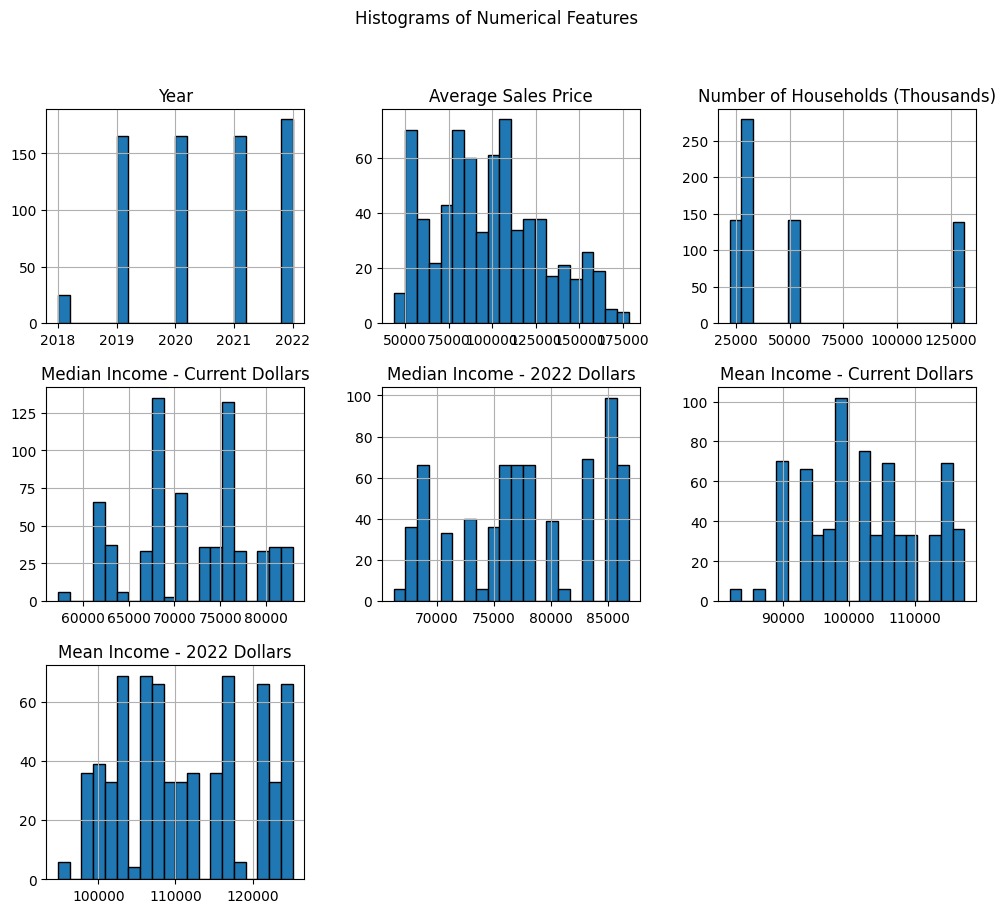

In [6]:
# 4. Univariate Analysis: Visualizing Distribution of Numeric Features
df[num_cols].hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle("Histograms of Numerical Features")
plt.show()

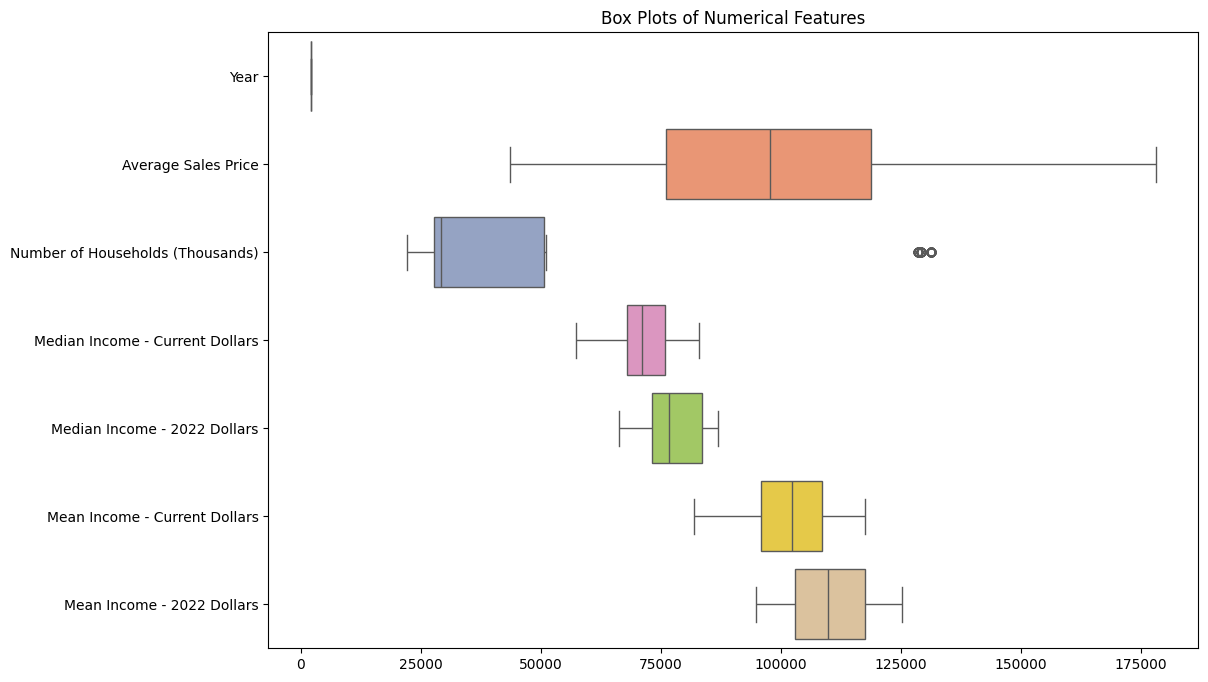

In [7]:
# Box Plots for Numerical Features
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[num_cols], orient='h', palette='Set2')
plt.title("Box Plots of Numerical Features")
plt.show()

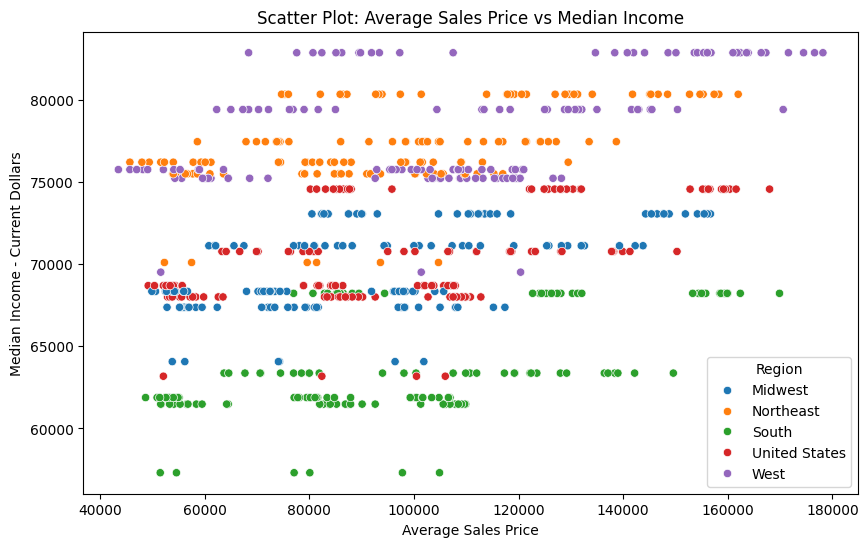

In [8]:
# 5. Bivariate Analysis: Scatter Plots
# Scatter plot for 'Average Sales Price' vs 'Median Income - Current Dollars'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Average Sales Price', y='Median Income - Current Dollars', hue='Region', palette='tab10')
plt.title('Scatter Plot: Average Sales Price vs Median Income')
plt.xlabel('Average Sales Price')
plt.ylabel('Median Income - Current Dollars')
plt.legend(title='Region')
plt.show()

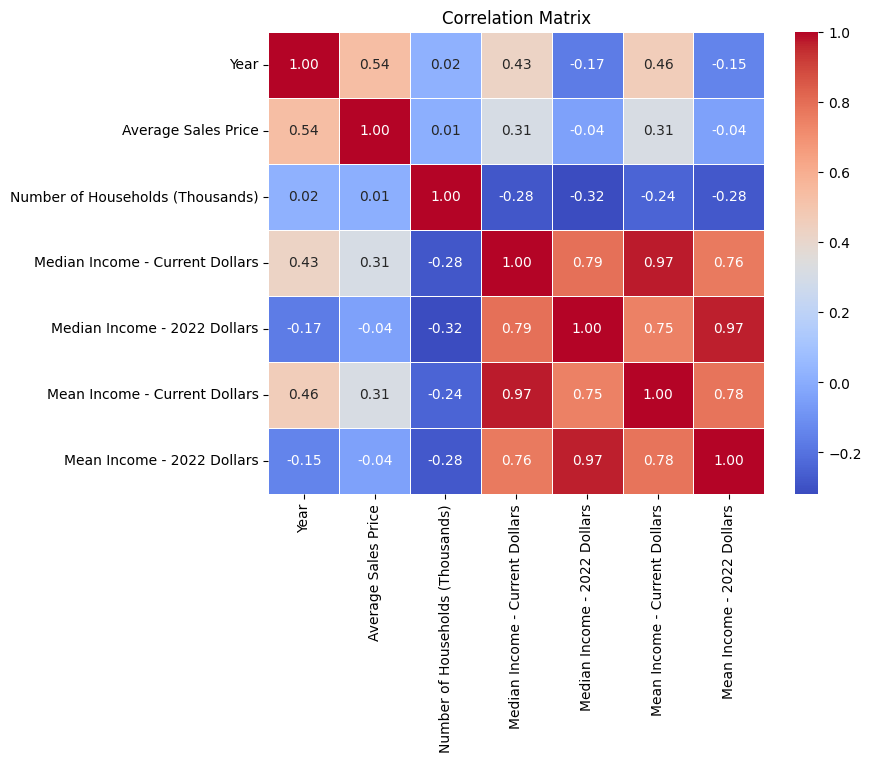

In [9]:
# 6. Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()